In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
from scipy import interpolate
from ctypes import *
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw, ImageFilter
import cv2 

Загрузка изображения,а затем преобразование цветовой гаммы из RGB в оттенки серого.

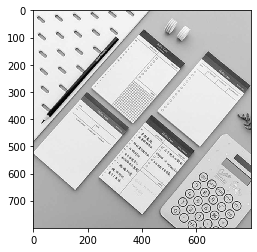

In [2]:
# загружаем изображение, сменим цвет на оттенки серого и уменьшим резкость
image = cv2.imread("images/7.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
imshow(gray, cmap=plt.get_cmap('gray'))

Определяем края (т.е. контуры) объектов на изображении

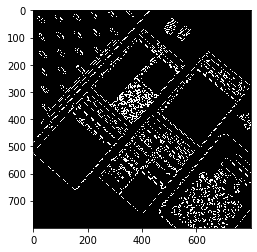

In [3]:
# распознавание контуров
edged = cv2.Canny(gray, 10, 250)
imshow(edged, cmap=plt.get_cmap('gray'))

Закроем контуры изображений

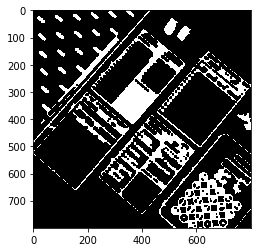

In [4]:
# создадим и применим закрытие
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
imshow(closed, cmap=plt.get_cmap('gray'))

Производим обнаружение контуров

In [5]:
# найдём контуры в изображении и подсчитаем количество блокнотов
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
total = 0

Проверка контура

In [6]:
# цикл по контурам
for c in cnts:
    # аппроксимируем (сглаживаем) контур
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    # если у контура 4 вершины, предполагаем, что это книга
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
total -= 1

Покажем результат, выделив его

Найдено: 4 блокнота


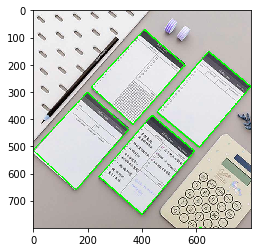

In [7]:
# показываем результирующее изображение
print("Найдено: {0} блокнота".format(total))
imshow(image)